In [3]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('phpMYEkMl.csv')


In [7]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

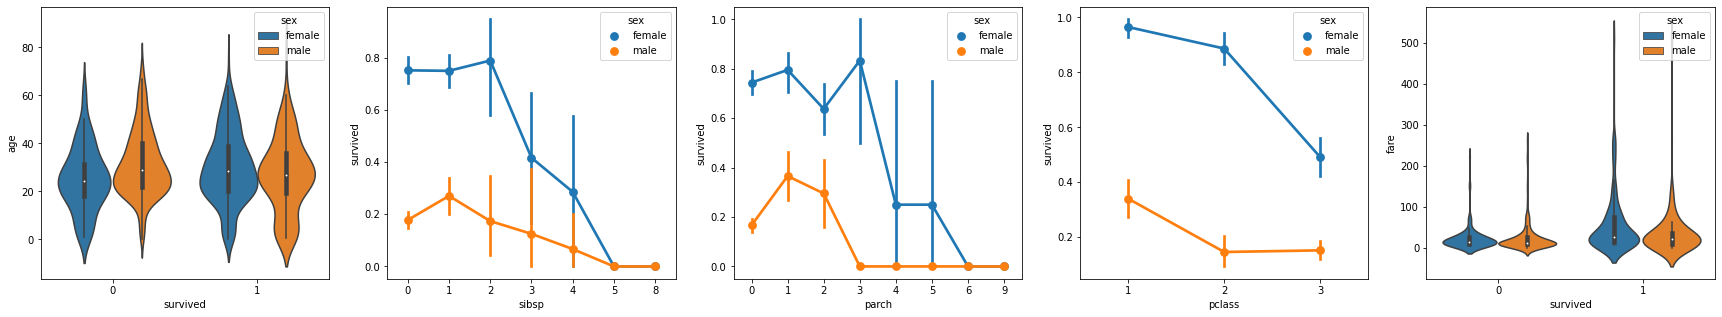

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fix, ax = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=ax[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=ax[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=ax[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=ax[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=ax[4])


In [12]:
data.replace({'male': 1, 'female': 0}, inplace=True)


In [13]:
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [14]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

In [15]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [16]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
#drop rows with NaN and low coorelation value in prep for ML modeling


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

# split data into test and train data

In [18]:
# normalize values of data IE age goes from 0-100 sex 0-1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [19]:
# train a new model

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [20]:
# test the model and get metrics
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


In [23]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(keras.layers.Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))



In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [26]:
#compile ML model and optimizations parameters, then train

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5849
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6065
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.7213
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.7691
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.7751
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7751
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7775
Epoch 11/50
27/27 [

In [27]:
#use test data to test model

y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.7942583732057417


In [28]:
#updated version of test
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(metrics.accuracy_score(y_test, y_pred))

0.7942583732057417
